# Demo of Handwriting Analysis using Machine Learning




In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

sys.path.append('../src')
from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

Loading segmentation models...
INFO:tensorflow:Restoring parameters from /home/roshan/2019/OCRSUmmit/Summision/Submission/src/ocr/../../models/gap-clas/CNN-CG
INFO:tensorflow:Restoring parameters from /home/roshan/2019/OCRSUmmit/Summision/Submission/src/ocr/../../models/gap-clas/RNN/Bi-RNN-new


In [2]:

IMG = 'text4'    # 1, 2, 3
LANG = 'en'      # en
MODEL_LOC = '../models/char-clas/' + LANG + '/CharClassifier'

In [3]:
CHARACTER_MODEL = Model(MODEL_LOC)

INFO:tensorflow:Restoring parameters from ../models/char-clas/en/CharClassifier


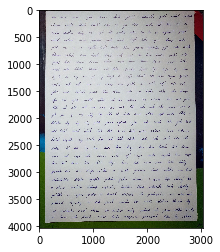

In [4]:
image = cv2.cvtColor(cv2.imread("../data/pages/%s.jpg" % IMG), cv2.COLOR_BGR2RGB)
implt(image)

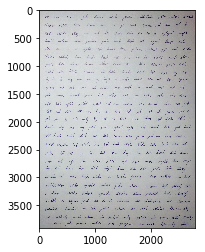

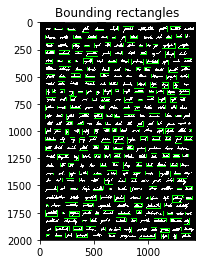

In [5]:
# Crop image and get bounding boxes
crop = page.detection(image)
implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

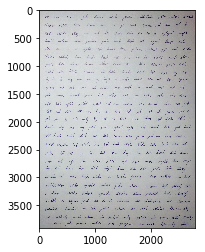

on ona ono jel tam vlak jezdi nakladak prsi snezi mrznl
sleence sviti bezi krici zas se ji obed cesk sel bez ni k
rada otazka vzdy na spi bdi svetlo reka co to je raglepsi preje
dalsi mluvi nea pomaee proto vsak sejk sek nyni hraje kolo
jsed za v s ryckle ridi kouse um jednon dvakrat pije voda svetlo
obbsm sakoda tma duch krad roh zni do lesa listi padai vitr
fauke huci strom kmen vetm roste sem klina kamen papir tuska
mvdre nek zluta cervena mic balon branka hasi eyt bje by za
ky ti ta ny mi ja vy baje si nrys sesit cte pise dopis sprava
sprava sed eet ma me slovo pro podl u mit myt vyt vit
jelen mroz tasnak prase kun puros sob pes kocka ocha oko okna
ufo leti oyeet jeilet oyhled rok olen neesic cas minuta leze nes pod
hul sul kul vul nos kos los host lek pek pak ale pane zase a
jak jen j muj steej lej stul ul urak unos ukos hjg uprk ulet i
hvezda alej raj naj potok jezero ryhnik ryba rak znak lak jok kack
pue krat znat ptat tat led zima ldo jaro podzim konec eodina
kuzel krychle cvg 

In [6]:
def recognise(img):
    """ Recognising word and printing it """
    # Pre-processing the word
    img = word_normalization(
        img,
        60,
        border=False,
        tilt=True,
        hyst_norm=True)

    # Separate letters
    img = cv2.copyMakeBorder(
        img,
        0, 0, 30, 30,
        cv2.BORDER_CONSTANT,
        value=[0, 0, 0])
    gaps = characters.segment(img, RNN=True)

    chars = []
    for i in range(len(gaps)-1):
        char = img[:, gaps[i]:gaps[i+1]]
        char, dim = letter_normalization(char, is_thresh=True, dim=True)
        # TODO Test different values
        if dim[0] > 4 and dim[1] > 4:
            chars.append(char.flatten())

    chars = np.array(chars)
    word = ''        
    if len(chars) != 0:
        pred = CHARACTER_MODEL.run(chars)                
        for c in pred:
            word += idx2char(c)

    return word

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))



# THANK YOU 